<a href="https://colab.research.google.com/github/gui98araujo/Machine_Learning_Projects/blob/main/Clusterizacao(KMeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
%%capture
%pip install kmodes

In [159]:
#Data Wrangling
import numpy as np
import pandas as pd

#Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import kelbow_visualizer, SilhouetteVisualizer, KElbowVisualizer, silhouette_visualizer

## -- Machine Learning -- ##

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from kmodes.kmodes import KModes      # clustering Categorical data
from kmodes.kprototypes import KPrototypes # clustering mixed data

#Didatic purposes
import string
from ipywidgets import interact


In [160]:
sns.set_theme(
    context='talk',
    style = 'ticks',
    font_scale =0,
    palette='tab10',
    rc = {
        'figure.figsize':(12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad':20,
    }
)

scatter_kwargs = dict(palette='viridis',alpha = 0.8, lidewidth = 0)

# Introdução a Kmeans #

Características: Utilizado bastante na indústria e requer dados numéricos contínuos na mesma escala. Requer a quantidade de grupos que você quer formar

Vantagens: Conhecido e escalável
Desvantagens: Sensível à outlier e não adqueado para dados categóricos.É preciso definir quais as quantidades de K(grupos), mas existe como definir isso computacionalmente.

Método não supervisionado como o k-means não funciona para predições, pode ser uma fase prévia de um modelo preditivo, mas nunca o modelo preditivo em si.

Modelo que utiliza a distância entre pontos.

1. Defininir o número de clusters.
2. Definir os centróides, pontos centrais de observação.
3. Categorizar cada ponto do seu centróide mais próximo
4. Mover os centróides para o centro (média) dos pontos em sua categoria.
5. Repetir as etapas 3 e 4 até as posições  dos centróides não modificaram ou atingir um número máximo de iterações.

O k-means++ não inicia os centróides de forma aleatória, sendo melhor então para evitar mais etapas, chegando na convergência mais rápido e estruturando melhor os grupos.

. Métricas de avaliação de Kmeans
1. WCSS: Soma ou distorção dos quadrados dentro do seu cluster. Quanto mais cluster, menos variância.
2. Silhouete: Verifica a quantidade de K por observação.

Não há normalização nessas métricas.

#Simulated Data#

In [161]:
# Simulate Clusters
X,y = datasets.make_blobs(n_samples = int(5E3), n_features =  2, centers = 4, cluster_std = .8)
df = pd.DataFrame(X, columns = list(string.ascii_uppercase[:X.shape[1]]))

In [162]:
df.head()

,A,B
0,4.322394,-10.139475
1,2.314882,-1.753844
2,4.622488,-9.286587
3,0.969529,-6.236402
4,4.249985,-8.256338


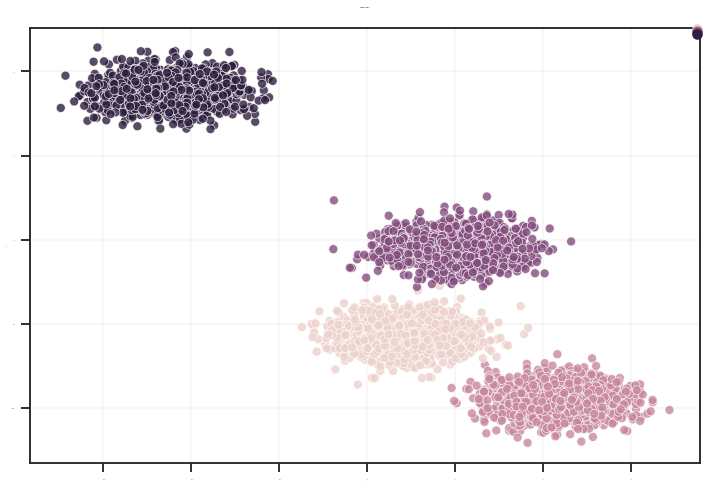

In [163]:
#Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue = y, alpha=.8)
plt.title('Labeled clusters')
plt.show()

# Distinct APIs for K-means #

No sklearn, podemos utilizar algoritmos de clusterização através de classes ou funções

In [164]:
#Usando função
centroids, labels, intertia = k_means(X, n_clusters = 4)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


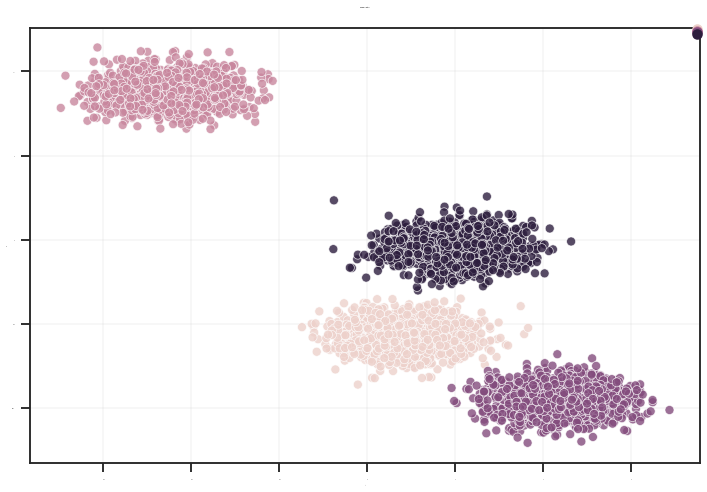

In [165]:
sns.scatterplot(data=df, x='A', y='B', hue = labels, alpha=.8)
plt.title('Labeled clusters')
plt.show()

In [166]:
#Classe se utiliza em pipelines, para utilizar para modelos supervisionados de classificação por exemplo
#Using KMeans
model = KMeans(n_clusters = 4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia =  model.inertia_

#A inicialização do centroide é pelo kmeans++ por default.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


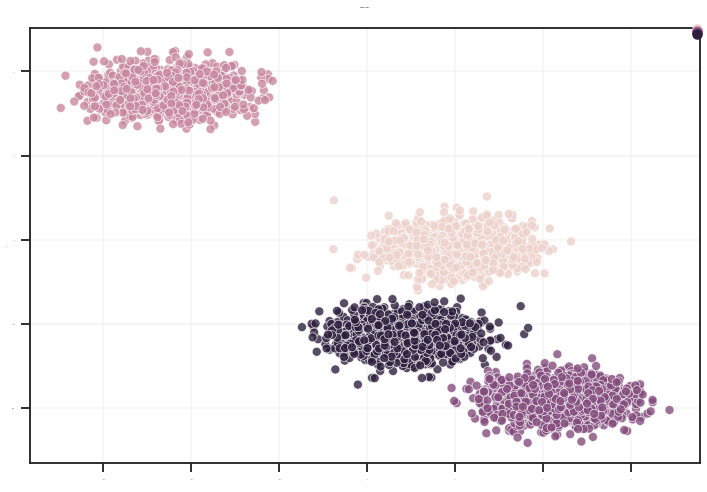

In [167]:
sns.scatterplot(data=df, x='A', y='B', hue = labels, alpha=.8)
plt.title('Labeled clusters')
plt.show()

In [168]:
centroids

array([[ 2.02039408, -0.50124143],
       [-4.49111475,  8.82560105],
       [ 4.28988139, -9.51957078],
       [ 0.879895  , -5.68915269]])

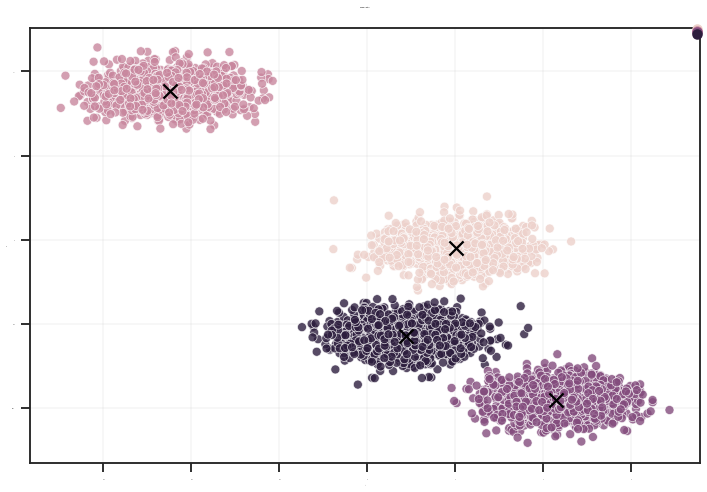

In [169]:
ax = sns.scatterplot(data=df, x='A', y='B', hue = labels, alpha=.8)
ax.scatter(x = centroids[:,0], y = centroids[:,1], marker ='x',s = 200, color = 'Black')

plt.title('Labeled clusters')
plt.show()

#Avaliando modelo #

In [170]:
# sklearn metrics
silhouette_score(X,labels)

0.7560653442505176

In [171]:
davies_bouldin_score(X,labels)

0.33324106766202527

In [172]:
calinski_harabasz_score(X,labels)

74907.39750315495

# Kelbow visualizer

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

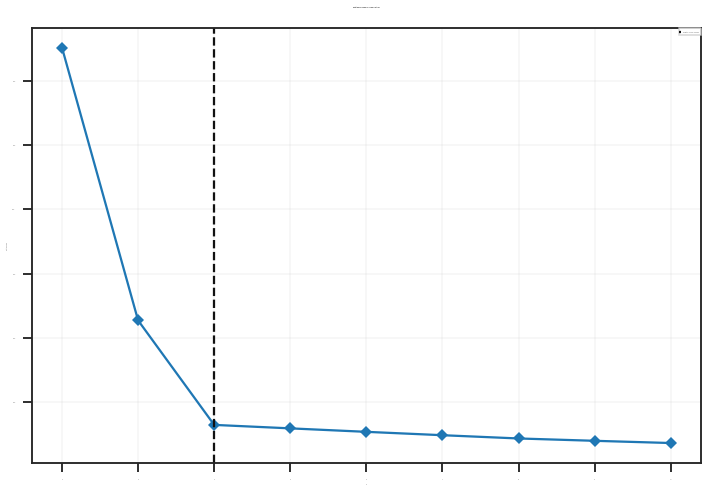

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [173]:
kelbow_visualizer(KMeans(), X, k = 10, timings  = False)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

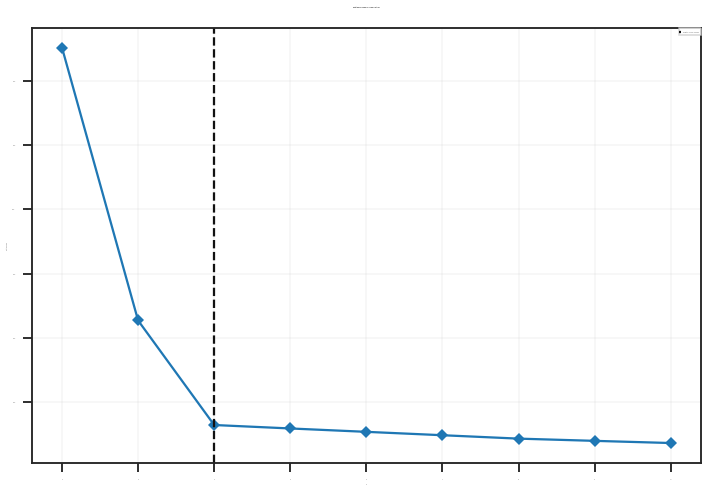

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [174]:
kelbow_visualizer(KMeans(), X, k = 10, metrics = 'silhouette',timings  = False)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


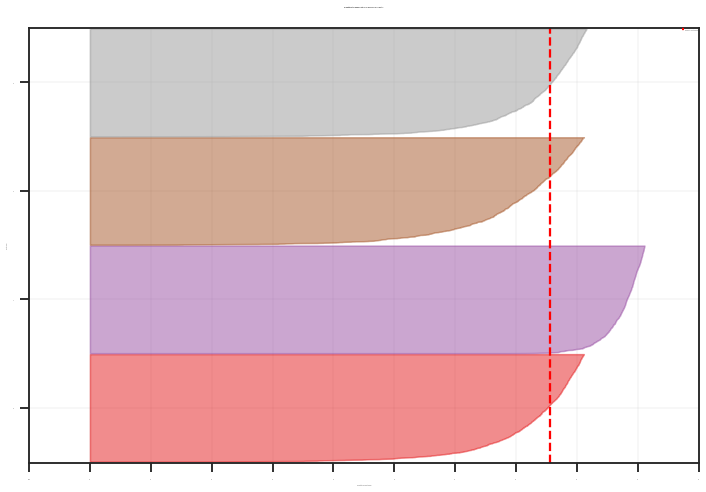

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [175]:
silhouette_visualizer(KMeans(n_clusters = 4), X)

In [176]:
# Create List of ditctionaries

cluster_metrics =  silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
for k in range (2,11):
  model = KMeans(n_clusters = k, random_state = 0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k' : k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X,labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

#Create Dataframe
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()
 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,65192.888807,0.726806,0.307621,17618.444348
3,22697.652691,0.667406,0.426166,29975.030181
4,6415.866836,0.756065,0.333241,74907.397503
5,5872.661189,0.644593,0.681576,61482.001594
6,5347.959849,0.535434,0.918167,54102.294906
7,4809.284436,0.404724,1.120319,50215.489798
8,4329.584781,0.307806,1.260848,47891.836651
9,3937.407812,0.318670,1.137882,46130.783830
10,3614.664146,0.319240,1.068754,44706.062884


In [177]:
#X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.06880716, 0.02512917],
       [0.12552311, 0.52215465],
       [0.51960542, 0.5279505 ],
       ...,
       [0.99630633, 0.52680457],
       [0.63090799, 0.75157241],
       [0.38079681, 0.28961379]])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

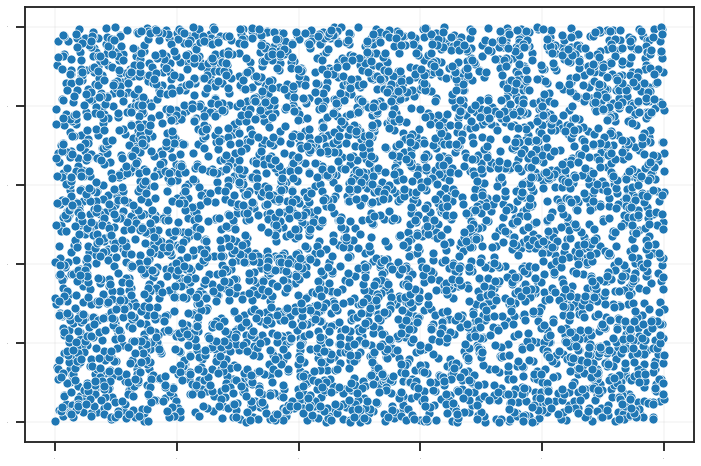

In [178]:
sns.scatterplot(X_random[:,0], X_random[:,1])

In [179]:
# Create List of ditctionaries

cluster_metrics =  silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range (2,11):
  model = KMeans(n_clusters = k, random_state = 0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k' : k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random,labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

#Create Dataframe
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()
 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,525.734265,0.359805,1.170983,3076.474423
3,329.990658,0.383916,0.851099,3932.253084
4,208.055095,0.412245,0.765546,5133.100097
5,177.179854,0.380761,0.877425,4737.364242
6,149.019666,0.359591,0.941444,4693.918212
7,127.217588,0.364322,0.875156,4723.843017
8,105.729599,0.367066,0.804347,5016.010325
9,92.538401,0.369544,0.774593,5102.271107
10,84.407601,0.371971,0.808021,5024.647455


Comparando de forma interativa

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


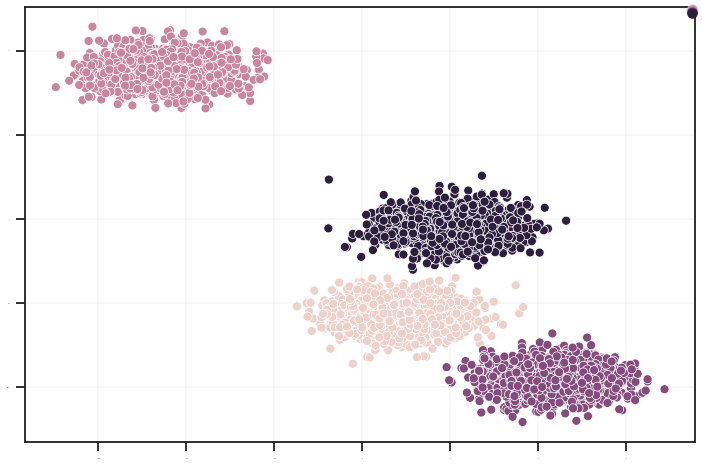

In [180]:
def plot_kmeans(k,data):
  data = X if data == 'X' else X
  model = KMeans(n_clusters = k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y =data[:,1], hue = labels)

plot_kmeans(4,'X_random')

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


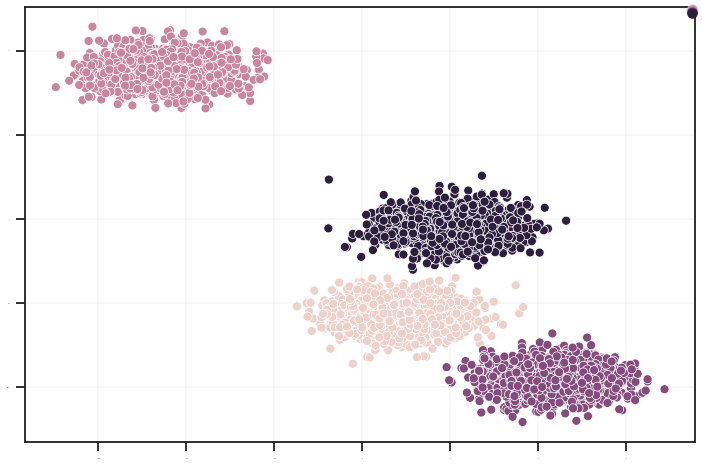

In [181]:
@interact(k=(2,11), data = ['X','X_random'])
def plot_kmeans(k,data):
  data = X if data == 'X' else X
  model = KMeans(n_clusters = k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y =data[:,1], hue = labels)

plot_kmeans(4,'X_random')

## HIGH DIMENSIONAL DATA ##

In [185]:
X_dim,y_dim = datasets.make_blobs(n_samples = int(1E3), n_features =  10, centers = 4, cluster_std = .8,random_state = 0)
df_dim = pd.DataFrame(X_dim, columns = list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [186]:
# Apply PCA

pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns = [f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215
...,...,...,...,...,...,...,...,...,...,...
995,-6.590360,3.422836,6.599212,-1.688134,0.281325,0.597289,0.406577,0.046039,0.643861,-0.928400
996,-7.330300,3.541334,4.587332,0.810124,1.054155,-1.566163,-0.340734,-0.499334,-1.155100,-0.353791
997,-6.411780,5.056657,5.401471,0.665292,0.160854,-0.069270,-0.404070,0.207449,0.184674,0.605232
998,-9.947851,-4.739351,-3.272195,0.732262,-0.496340,-0.558349,-0.108244,0.305074,-0.048046,-0.388834


In [187]:
#Verify explained variance
pca.explained_variance_ratio_

array([0.55329463, 0.30754183, 0.1084529 , 0.00489897, 0.00476467,
       0.00450932, 0.0043888 , 0.00428211, 0.00408586, 0.00378091])

In [188]:
#Portanto, utilizaramos apenas as 2 ou 3 primeiras colunas.

In [189]:
pd.DataFrame(
   {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
   index =df_pca.columns
    )

#As 3 primeiras colunas explicam 96% dos dados.

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

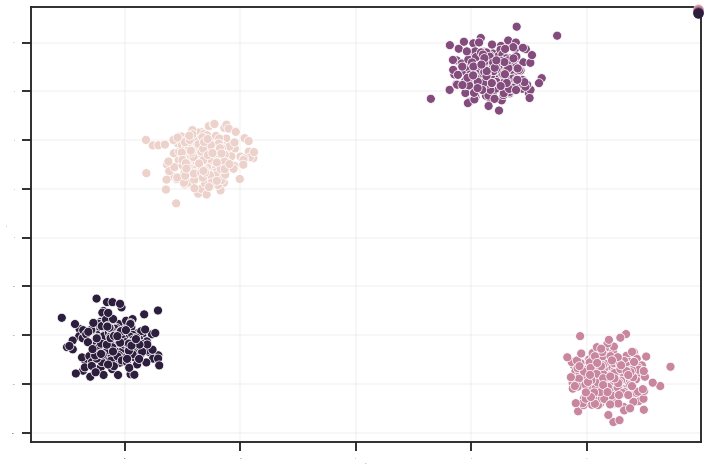

In [190]:
# Plot PCA with True Label
sns.scatterplot(data = df_pca, x='PC1',y='PC2', hue=y_dim)

In [191]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

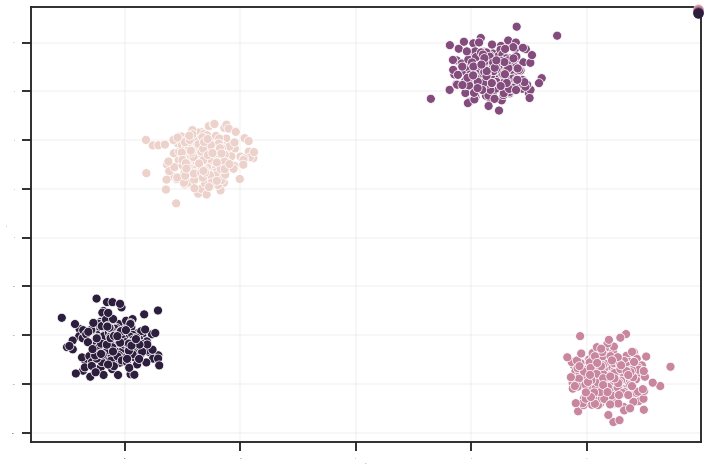

In [192]:
sns.scatterplot(data = df_pca, x='PC1',y='PC2', hue=y_dim)

In [194]:
# 3D PCA plot
px.scatter_3d(df_pca, x = 'PC1', y='PC2', z = 'PC3', template ='plotly_dark')